In [ ]:
!unzip "/content/drive/MyDrive/TumorSegmentasyon/data.zip" -d "/content/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/train/labels/Papiloma_T1C+_7.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_70.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_71.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_73.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_74.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_76.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_77.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_79.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_8.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_80.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_81.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_82.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_83.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_85.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_86.txt  
  inflatin

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import Precision, Recall
from keras.applications import VGG16

In [ ]:
train_images = []
train_masks = []
train_masks_temp = []
val_images = []
val_masks = []
val_masks_temp = []
test_images = []
test_masks = []
test_masks_temp = []

path = "/content/data/train/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_images.append(path + fileName)

path = "/content/data/train/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_masks_temp.append(path + fileName)

path = "/content/data/val/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_images.append(path + fileName)

path = "/content/data/val/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_masks_temp.append(path + fileName)

path = "/content/data/test/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_images.append(path + fileName)

path = "/content/data/test/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_masks_temp.append(path + fileName)

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
0
3160
405
0
405
391
0
391


In [ ]:
for imagePath in train_images:
    for maskPath in train_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            train_masks.append(maskPath)
            break

for imagePath in val_images:
    for maskPath in val_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            val_masks.append(maskPath)
            break

for imagePath in test_images:
    for maskPath in test_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            test_masks.append(maskPath)
            break

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
3160
3160
405
405
405
391
391
391


In [ ]:
print(train_images[0], train_masks[0])
print(val_images[0], val_masks[0])
print(test_images[0], test_masks[0])

/content/data/train/images/Neurocitoma_T2_71.jpeg /content/data/train/masks/Neurocitoma_T2_71_mask.jpg
/content/data/val/images/Astrocitoma_T1_112.jpeg /content/data/val/masks/Astrocitoma_T1_112_mask.jpg
/content/data/test/images/Meningioma_T1C+_10.jpeg /content/data/test/masks/Meningioma_T1C+_10_mask.jpg


In [ ]:
def get_df(image_paths, mask_paths):
    pd_df = pd.DataFrame({
        'image_paths' : image_paths,
        'mask_paths' : mask_paths
    })
    return pd_df

In [ ]:
train_df = get_df(train_images, train_masks)
val_df = get_df(val_images, val_masks)
test_df = get_df(test_images, test_masks)

In [ ]:
train_df

image_paths  \
0     /content/data/train/images/Neurocitoma_T2_71.jpeg   
1     /content/data/train/images/Tuberculoma_T1C+_66...   
2     /content/data/train/images/Oligodendroglioma_T...   
3     /content/data/train/images/Oligodendroglioma_T...   
4       /content/data/train/images/Meningioma_T2_18.jpg   
...                                                 ...   
3155   /content/data/train/images/Granuloma_T1C+_7.jpeg   
3156  /content/data/train/images/Glioblastoma_T1_37....   
3157  /content/data/train/images/Neurocitoma_T1C+_21...   
3158    /content/data/train/images/Meningioma_T2_90.jpg   
3159  /content/data/train/images/Meduloblastoma_T2_3...   

                                             mask_paths  
0     /content/data/train/masks/Neurocitoma_T2_71_ma...  
1     /content/data/train/masks/Tuberculoma_T1C+_66_...  
2     /content/data/train/masks/Oligodendroglioma_T1...  
3     /content/data/train/masks/Oligodendroglioma_T1...  
4     /content/data/train/masks/Meningioma_T2_18_mas...  
...                                                 ...  
3155  /content/data/train/masks/Granuloma_T1C+_7_mas...  
3156  /content/data/train/masks/Glioblastoma_T1_37_m...  
3157  /content/data/train/masks/Neurocitoma_T1C+_212...  
3158  /content/data/train/masks/Meningioma_T2_90_mas...  
3159  /content/data/train/masks/Meduloblastoma_T2_30...  

[3160 rows x 2 columns]

In [ ]:
val_df

image_paths  \
0     /content/data/val/images/Astrocitoma_T1_112.jpeg   
1    /content/data/val/images/Meningioma_T1C+_245.jpeg   
2    /content/data/val/images/Oligodendroglioma_T2_...   
3         /content/data/val/images/Ependimoma_T2_7.jpg   
4        /content/data/val/images/Papiloma_T1C+_72.jpg   
..                                                 ...   
400    /content/data/val/images/Neurocitoma_T2_77.jpeg   
401    /content/data/val/images/Meningioma_T2_191.jpeg   
402  /content/data/val/images/Oligodendroglioma_T1C...   
403    /content/data/val/images/Neurocitoma_T1_89.jpeg   
404    /content/data/val/images/Papiloma_T1C+_103.jpeg   

                                            mask_paths  
0    /content/data/val/masks/Astrocitoma_T1_112_mas...  
1    /content/data/val/masks/Meningioma_T1C+_245_ma...  
2    /content/data/val/masks/Oligodendroglioma_T2_4...  
3     /content/data/val/masks/Ependimoma_T2_7_mask.jpg  
4    /content/data/val/masks/Papiloma_T1C+_72_mask.jpg  
..                                                 ...  
400  /content/data/val/masks/Neurocitoma_T2_77_mask...  
401  /content/data/val/masks/Meningioma_T2_191_mask...  
402  /content/data/val/masks/Oligodendroglioma_T1C+...  
403  /content/data/val/masks/Neurocitoma_T1_89_mask...  
404  /content/data/val/masks/Papiloma_T1C+_103_mask...  

[405 rows x 2 columns]

In [ ]:
test_df

image_paths  \
0    /content/data/test/images/Meningioma_T1C+_10.jpeg   
1    /content/data/test/images/Schwannoma_T1C+_79.jpeg   
2     /content/data/test/images/Meningioma_T2_227.jpeg   
3    /content/data/test/images/Oligodendroglioma_T1...   
4       /content/data/test/images/Papiloma_T1C+_12.jpg   
..                                                 ...   
386  /content/data/test/images/Meningioma_T1C+_276....   
387  /content/data/test/images/Meduloblastoma_T1_5....   
388  /content/data/test/images/Meduloblastoma_T1_10...   
389  /content/data/test/images/Meningioma_T1C+_306....   
390  /content/data/test/images/Oligodendroglioma_T1...   

                                            mask_paths  
0    /content/data/test/masks/Meningioma_T1C+_10_ma...  
1    /content/data/test/masks/Schwannoma_T1C+_79_ma...  
2    /content/data/test/masks/Meningioma_T2_227_mas...  
3    /content/data/test/masks/Oligodendroglioma_T1_...  
4    /content/data/test/masks/Papiloma_T1C+_12_mask...  
..                                                 ...  
386  /content/data/test/masks/Meningioma_T1C+_276_m...  
387  /content/data/test/masks/Meduloblastoma_T1_5_m...  
388  /content/data/test/masks/Meduloblastoma_T1_10_...  
389  /content/data/test/masks/Meningioma_T1C+_306_m...  
390  /content/data/test/masks/Oligodendroglioma_T1C...  

[391 rows x 2 columns]

In [ ]:
img_size = (256, 256)
batch_size = 32

In [ ]:
def set_generator(data_frame, batch_size, aug_dict, target_size,
                    image_color_mode="rgb",
                    mask_color_mode="grayscale",
                    image_save_prefix="image",
                    mask_save_prefix="mask",
                    save_to_dir=None,
                    seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_paths",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_paths",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255.
    mask = mask / 255.
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [ ]:
train_gen = set_generator(train_df, batch_size, dict(), img_size)

val_gen = set_generator(val_df, batch_size, dict(), img_size)

test_gen = set_generator(test_df, batch_size, dict(), img_size)

In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_vgg16_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained VGG19 Model """
    vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = vgg16.get_layer("block1_conv2").output
    s2 = vgg16.get_layer("block2_conv2").output
    s3 = vgg16.get_layer("block3_conv3").output
    s4 = vgg16.get_layer("block4_conv3").output

    """ Bridge """
    b1 = vgg16.get_layer("block5_conv3").output

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="VGG16_U-Net")
    return model

In [ ]:
def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2.0 * intersection + smooth) / (union + smooth)

def iou_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

In [ ]:
model = build_vgg16_unet((256,256,3))

model.compile(optimizer=Adamax(learning_rate=0.001), loss=bce_dice_loss, metrics=['accuracy', Precision(), Recall(), dice_coef, iou_coef])

model.summary()

Model: "VGG16_U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                                                                                        

In [ ]:
file_path = "Clean-UNet-VGG16-Adamax-32-bce-dice.h5"
save_path = "/content/" + file_path
drive_path = "/content/drive/MyDrive/TumorSegmentasyon/" + file_path

In [ ]:
checkpoint = ModelCheckpoint(save_path,
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min',
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3,
                              mode='min',
                              min_lr=0.0001,
                              verbose= 1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           mode='min',
                           restore_best_weights=True,
                           verbose=1)

history = model.fit(train_gen,
                    epochs= 100,
                    callbacks=[early_stop, checkpoint, reduce_lr],
                    validation_data= val_gen,
                    steps_per_epoch=len(train_df) / batch_size,
                    validation_steps=len(val_df) / batch_size)

Found 3160 validated image filenames.
Found 3160 validated image filenames.
Epoch 1/100
99/98 [==============================] - ETA: 0s - loss: 1.0319 - accuracy: 0.9462 - precision: 0.2441 - recall: 0.4958 - dice_coef: 0.1820 - iou_coef: 0.1027Found 405 validated image filenames.
Found 405 validated image filenames.

Epoch 1: val_loss improved from inf to 1.60605, saving model to /content/Clean-UNet-VGG16-Adamax-32-bce-dice.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


98/98 [==============================] - 332s 3s/step - loss: 1.0319 - accuracy: 0.9462 - precision: 0.2441 - recall: 0.4958 - dice_coef: 0.1820 - iou_coef: 0.1027 - val_loss: 1.6060 - val_accuracy: 0.6885 - val_precision: 0.0561 - val_recall: 0.6916 - val_dice_coef: 0.0764 - val_iou_coef: 0.0398 - lr: 0.0010
Epoch 2/100
99/98 [==============================] - ETA: 0s - loss: 0.5955 - accuracy: 0.9804 - precision: 0.6159 - recall: 0.6875 - dice_coef: 0.4779 - iou_coef: 0.3193
Epoch 2: val_loss improved from 1.60605 to 0.78660, saving model to /content/Clean-UNet-VGG16-Adamax-32-bce-dice.h5
98/98 [==============================] - 170s 2s/step - loss: 0.5955 - accuracy: 0.9804 - precision: 0.6159 - recall: 0.6875 - dice_coef: 0.4779 - iou_coef: 0.3193 - val_loss: 0.7866 - val_accuracy: 0.9857 - val_precision: 0.8647 - val_recall: 0.5125 - val_dice_coef: 0.2991 - val_iou_coef: 0.1767 - lr: 0.0010
Epoch 3/100
99/98 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.9

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_iou = hist.history['iou_coef']
    tr_dice = hist.history['dice_coef']
    tr_loss = hist.history['loss']

    val_acc = hist.history['val_accuracy']
    val_iou = hist.history['val_iou_coef']
    val_dice = hist.history['val_dice_coef']
    val_loss = hist.history['val_loss']

    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    index_iou = np.argmax(iou_coef)
    iou_highest = val_iou[index_iou]
    index_dice = np.argmax(dice_coef)
    dice_highest = val_dice[index_dice]
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    Epochs = [i+1 for i in range(len(tr_acc))]

    acc_label = f'best epoch= {str(index_acc + 1)}'
    iou_label = f'best epoch= {str(index_iou + 1)}'
    dice_label = f'best epoch= {str(index_dice + 1)}'
    loss_label = f'best epoch= {str(index_loss + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 20))
    plt.style.use('fivethirtyeight')

    # Training Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training IoU
    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_iou, 'r', label= 'Training IoU')
    plt.plot(Epochs, val_iou, 'g', label= 'Validation IoU')
    plt.scatter(index_iou + 1 , iou_highest, s= 150, c= 'blue', label= iou_label)
    plt.title('Training and Validation IoU Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.legend()

    # Training Dice
    plt.subplot(2, 2, 3)
    plt.plot(Epochs, tr_dice, 'r', label= 'Training Dice')
    plt.plot(Epochs, val_dice, 'g', label= 'Validation Dice')
    plt.scatter(index_dice + 1 , dice_highest, s= 150, c= 'blue', label= dice_label)
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice')
    plt.legend()

    # Training Loss
    plt.subplot(2, 2, 4)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout
    plt.show()

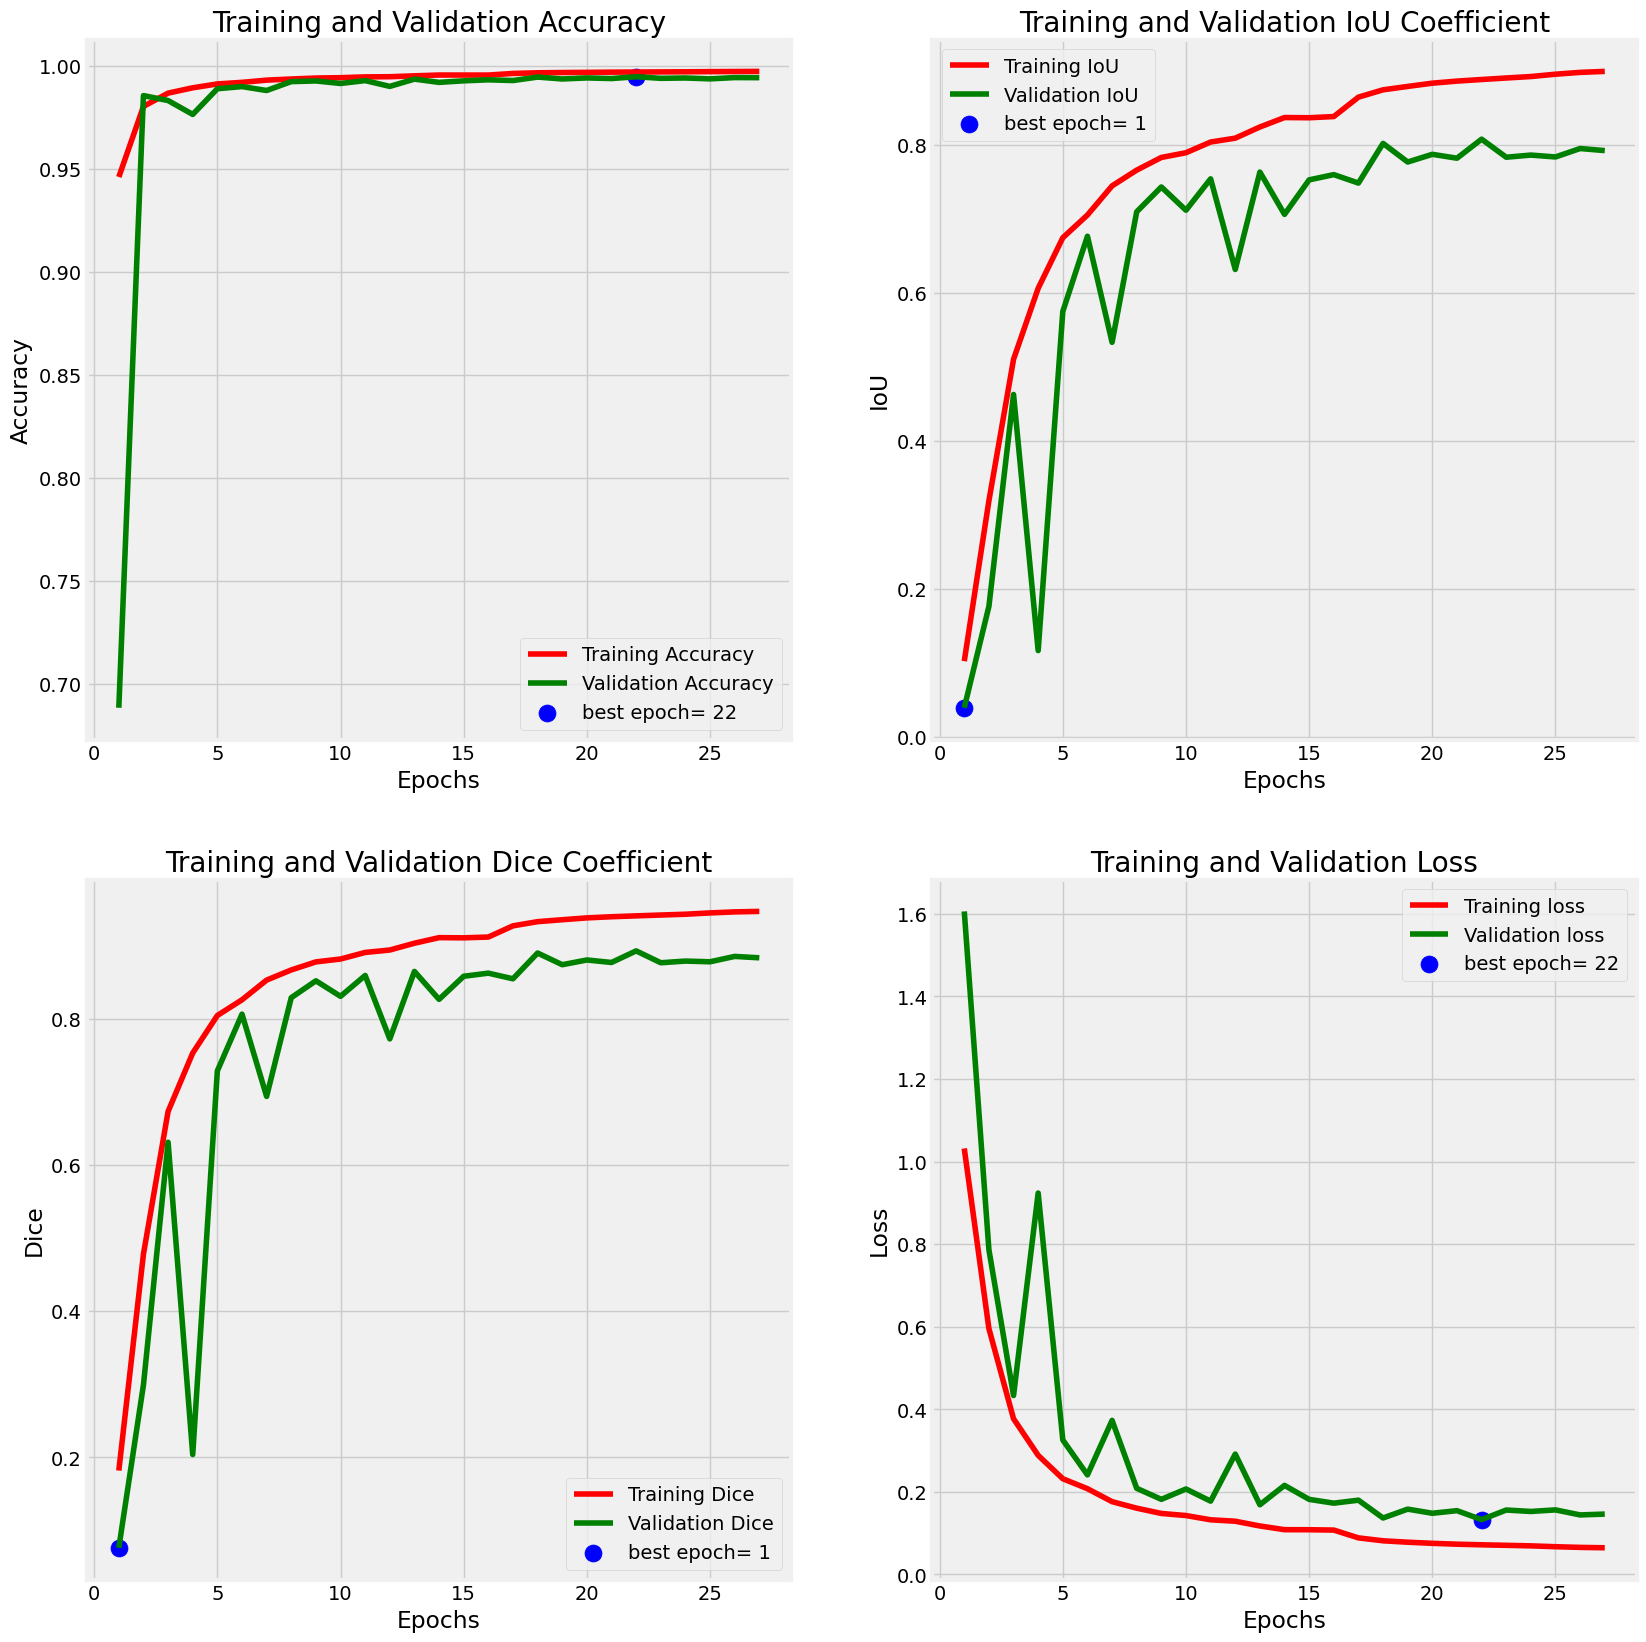

In [ ]:
plot_training(history)

In [ ]:
print(model.metrics_names)

['loss', 'accuracy', 'precision', 'recall', 'dice_coef', 'iou_coef']


In [ ]:
train_score = model.evaluate(train_gen, steps= len(train_df) / batch_size, verbose= 1)
valid_score = model.evaluate(val_gen, steps= len(val_df) / batch_size, verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_df) / batch_size, verbose= 1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Train Precision: ", train_score[2])
print("Train Recall: ", train_score[3])
print("Train Dice: ", train_score[4])
print("Train IoU: ", train_score[5])
print('-' * 20)

print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print("Valid Precision: ", valid_score[2])
print("Valid Recall: ", valid_score[3])
print("Valid Dice: ", valid_score[4])
print("Valid IoU: ", valid_score[5])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print("Test Precision: ", test_score[2])
print("Test Recall: ", test_score[3])
print("Test Dice: ", test_score[4])
print("Test IoU: ", test_score[5])

12/12 [==============================] - 7s 517ms/step - loss: 0.1434 - accuracy: 0.9946 - precision: 0.9172 - recall: 0.8641 - dice_coef: 0.8841 - iou_coef: 0.7930
Found 391 validated image filenames.
Found 391 validated image filenames.
12/12 [==============================] - 15s 1s/step - loss: 0.1257 - accuracy: 0.9950 - precision: 0.9236 - recall: 0.8843 - dice_coef: 0.8992 - iou_coef: 0.8184
Train Loss:  0.06934552639722824
Train Accuracy:  0.9972688555717468
Train Precision:  0.9532289505004883
Train Recall:  0.942217230796814
Train Dice:  0.9421492218971252
Train IoU:  0.8909698128700256
--------------------
Valid Loss:  0.143390953540802
Valid Accuracy:  0.9945797920227051
Valid Precision:  0.9171662926673889
Valid Recall:  0.8641221523284912
Valid Dice:  0.8840747475624084
Valid IoU:  0.7930185794830322
--------------------
Test Loss:  0.1257312148809433
Test Accuracy:  0.9949983954429626
Test Precision:  0.9235546588897705
Test Recall:  0.8843465447425842
Test Dice:  0.8992

Validation Images


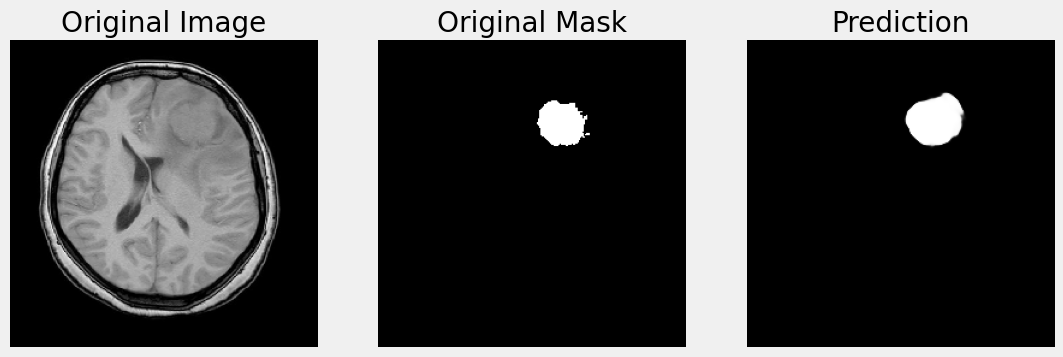

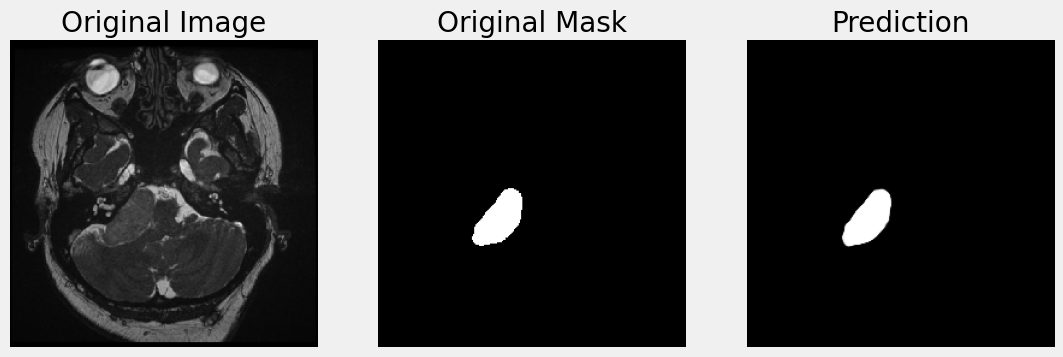

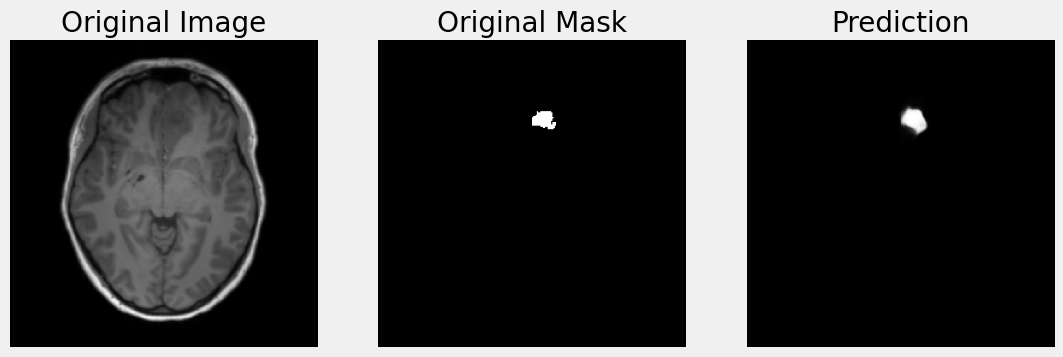

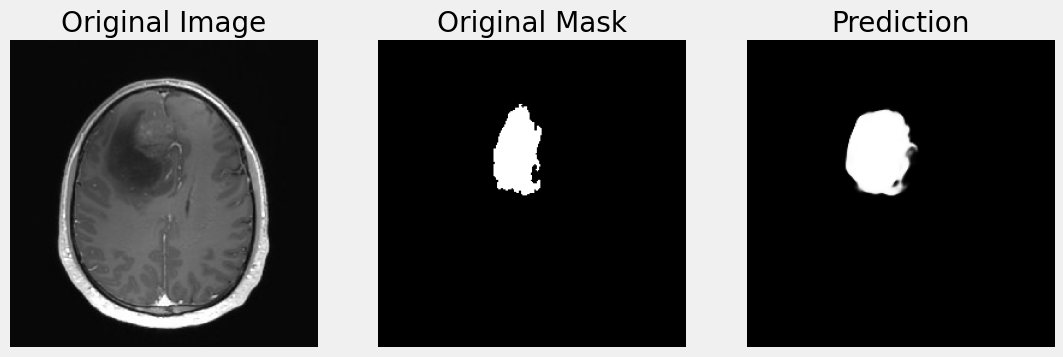

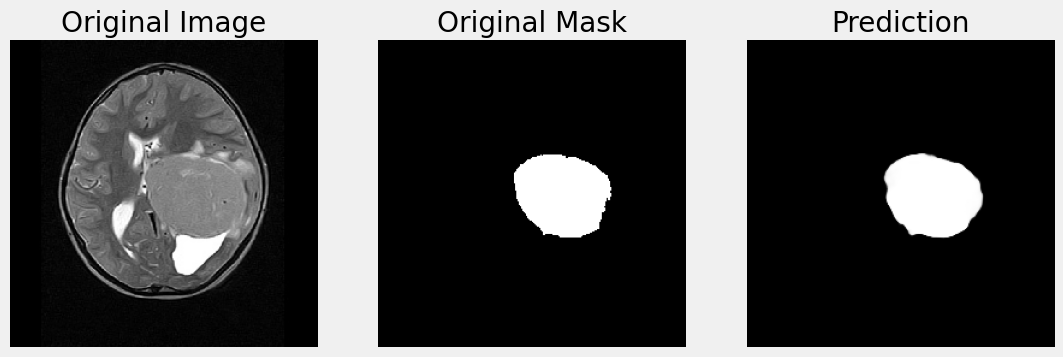

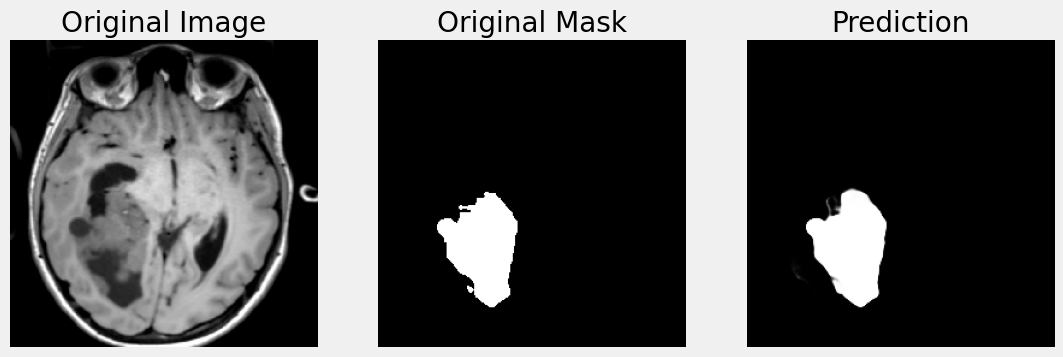

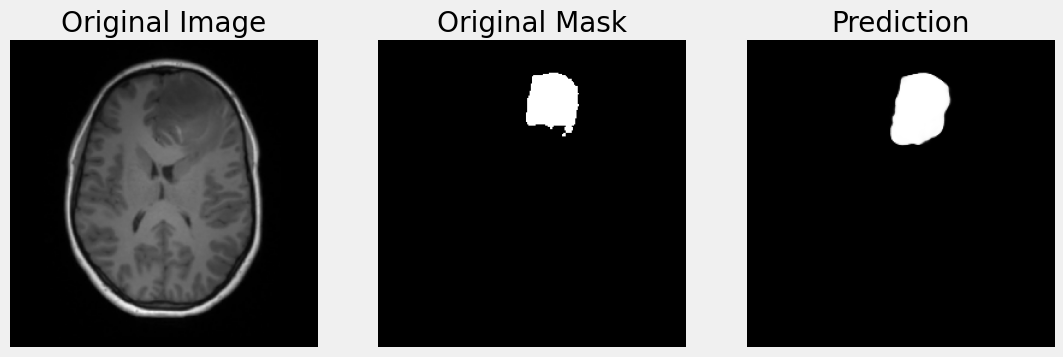

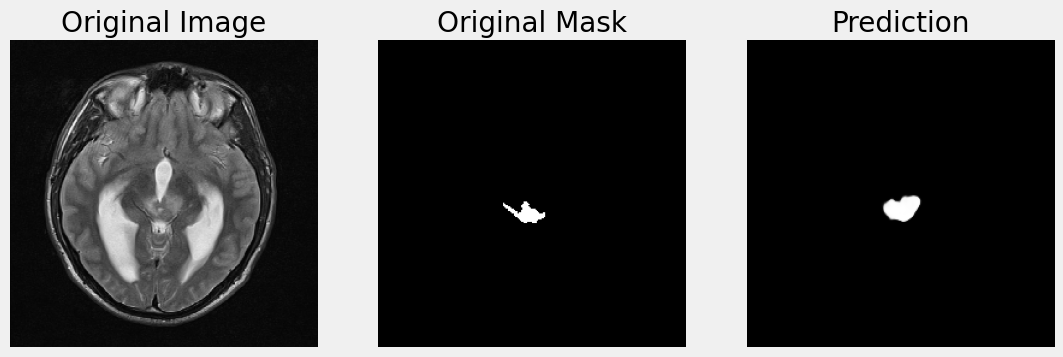

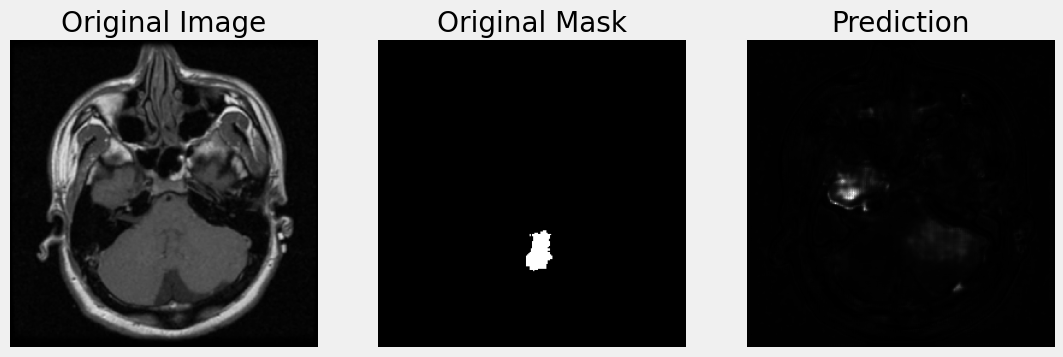

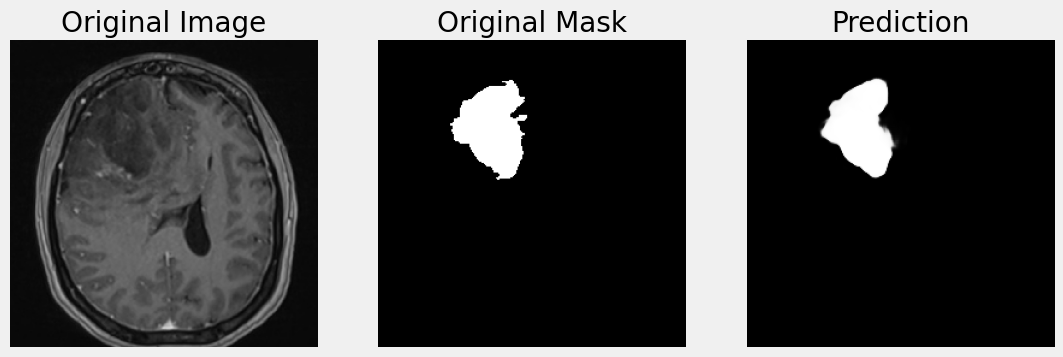

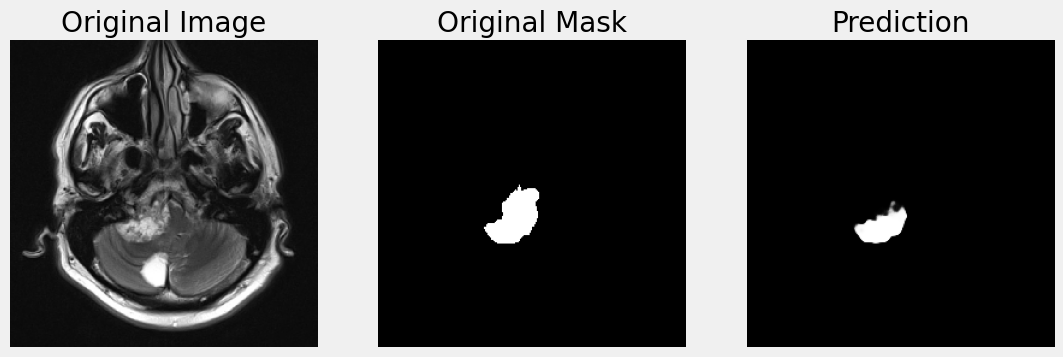

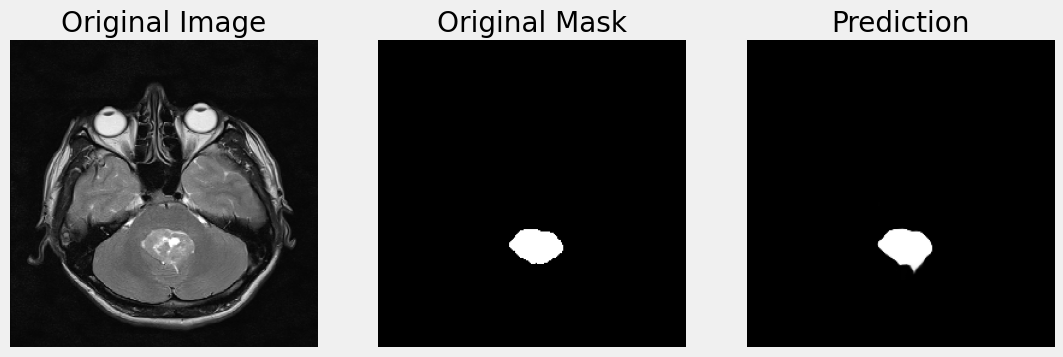

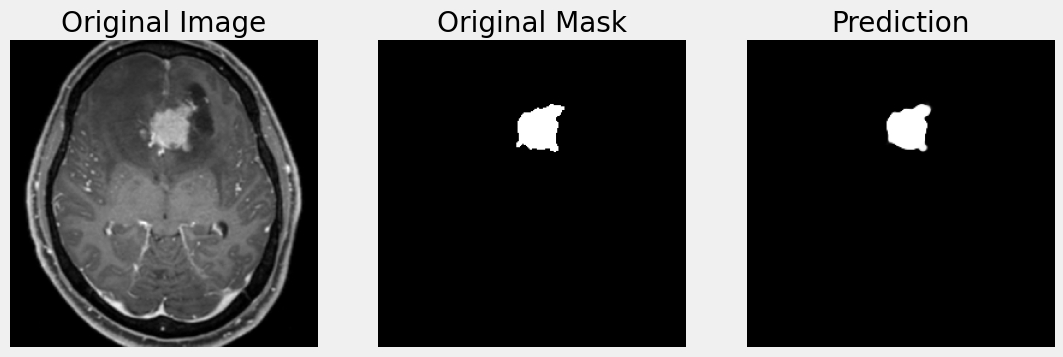

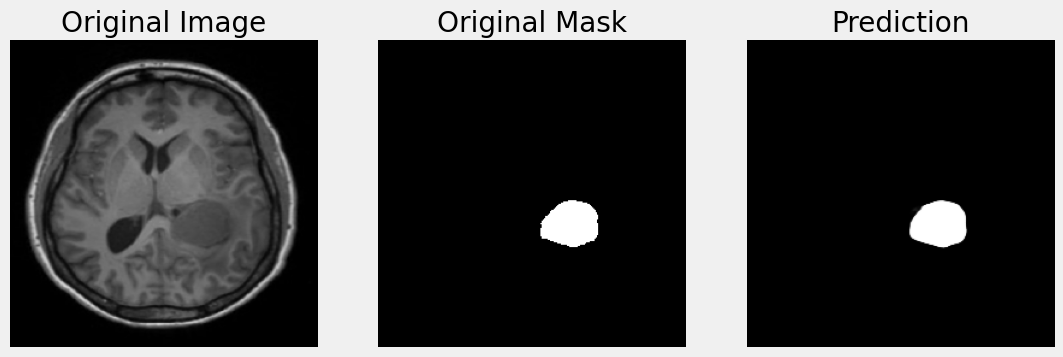

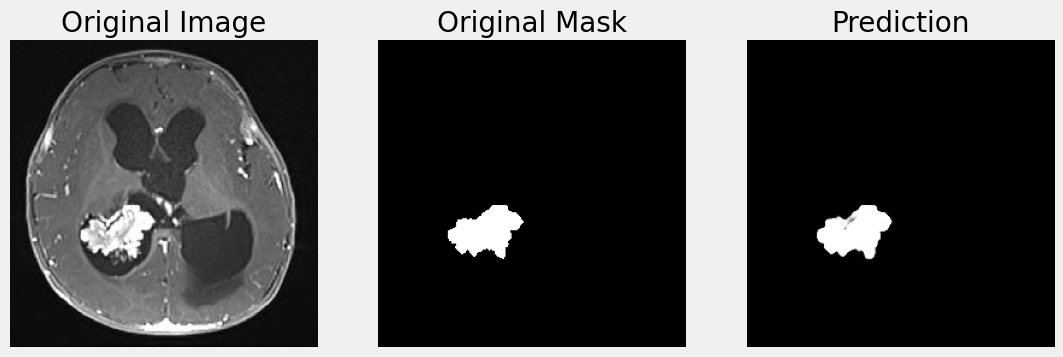

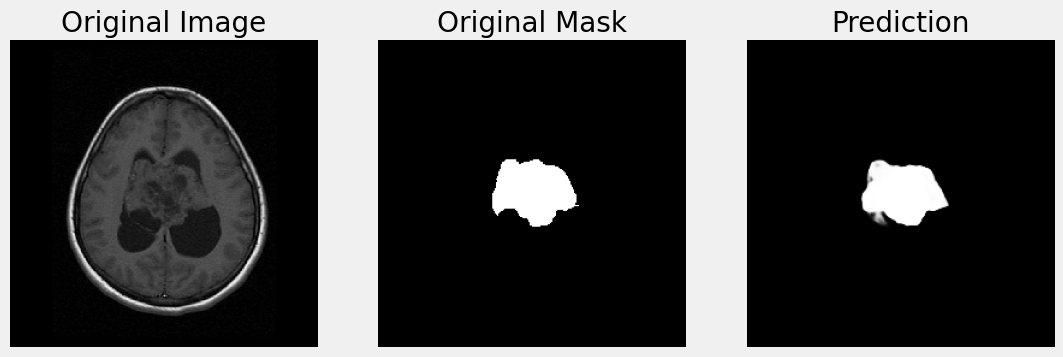

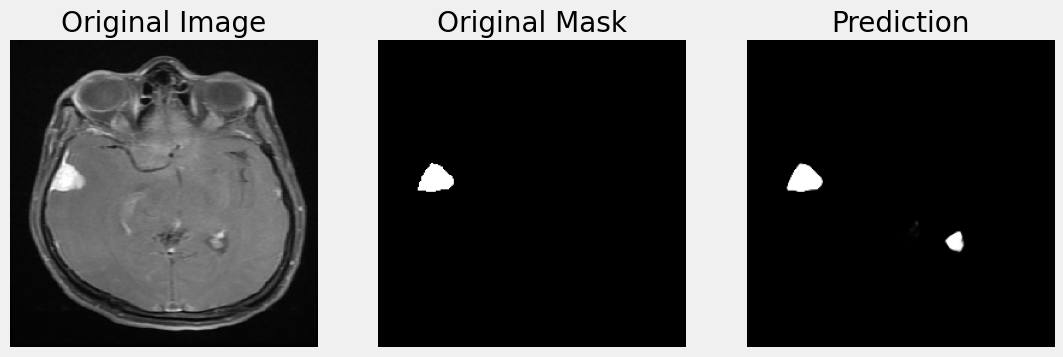

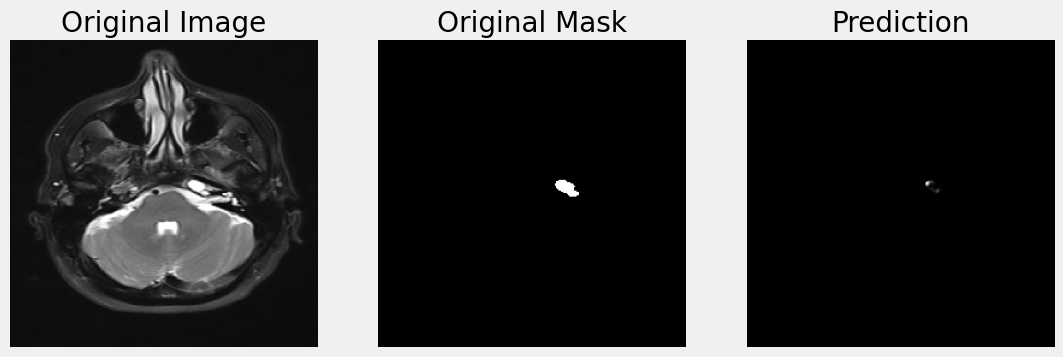

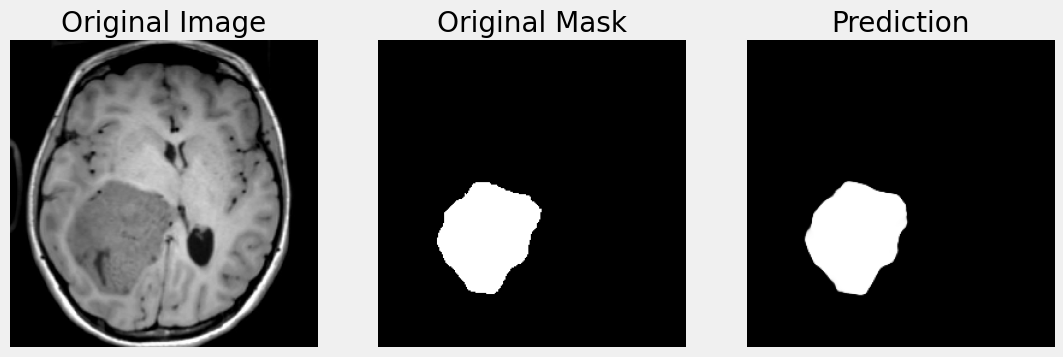

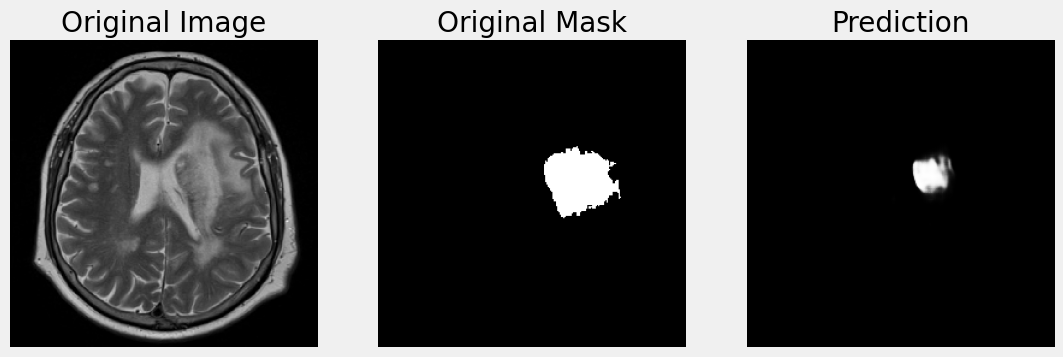

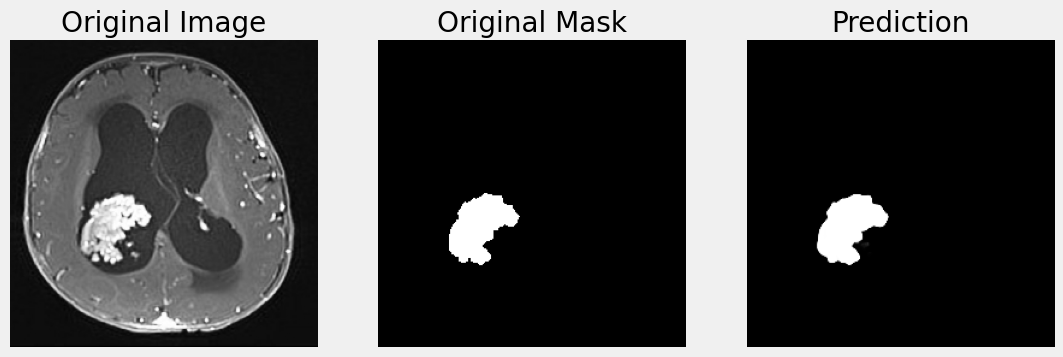

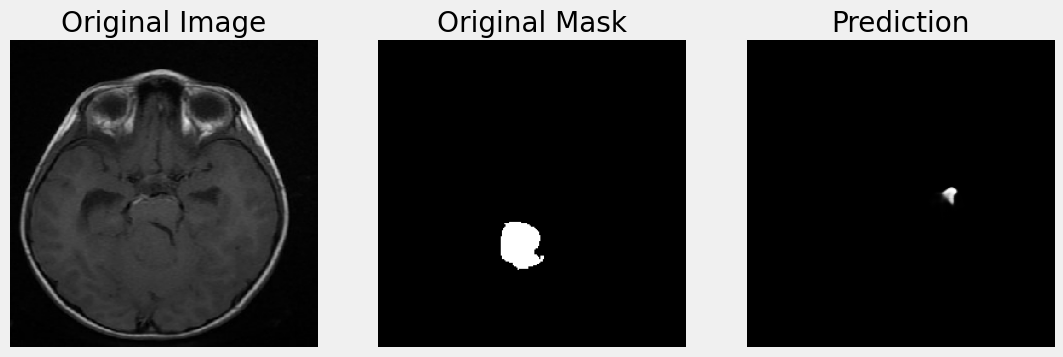

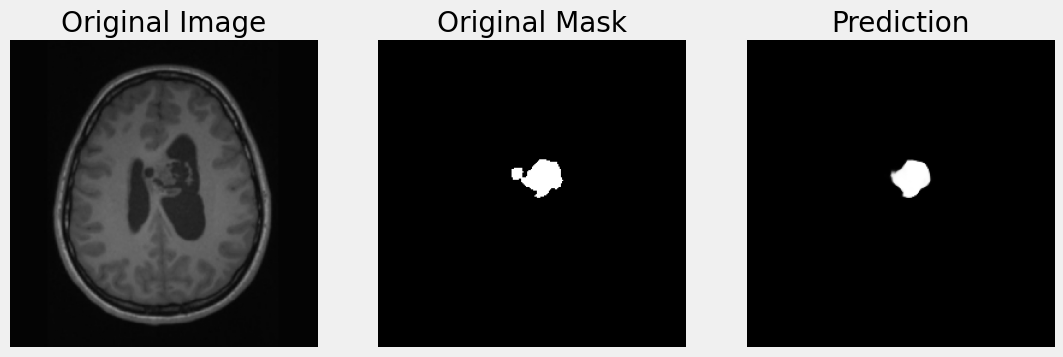

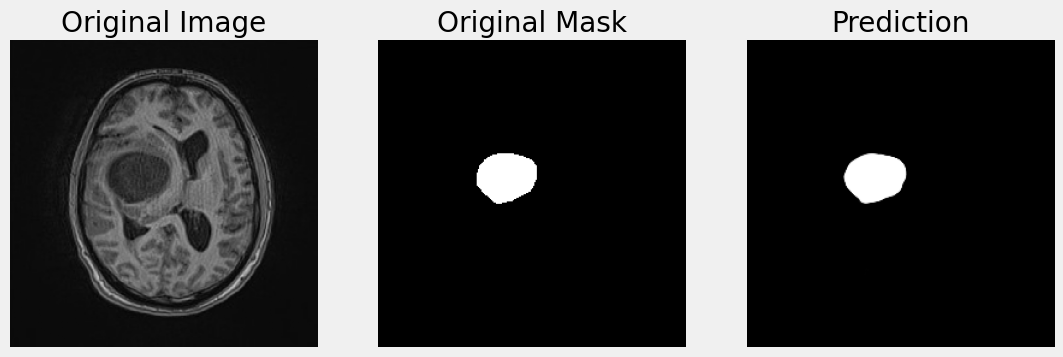

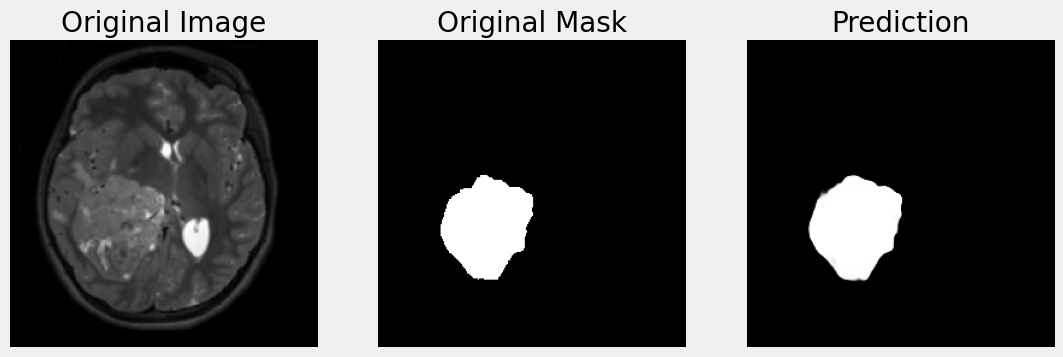

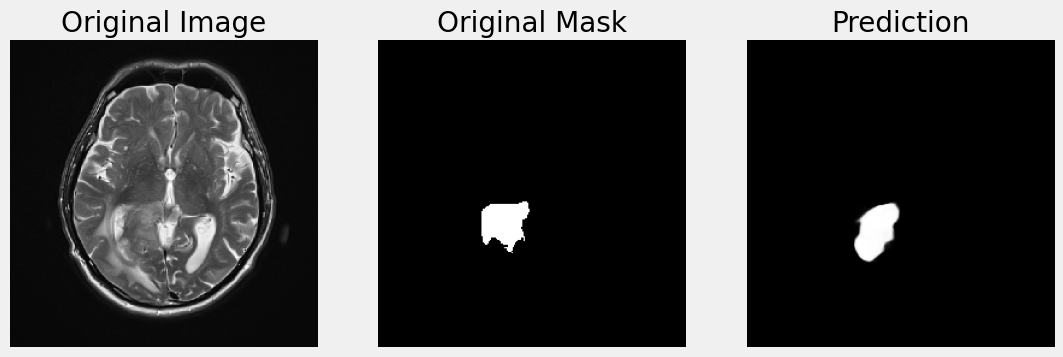

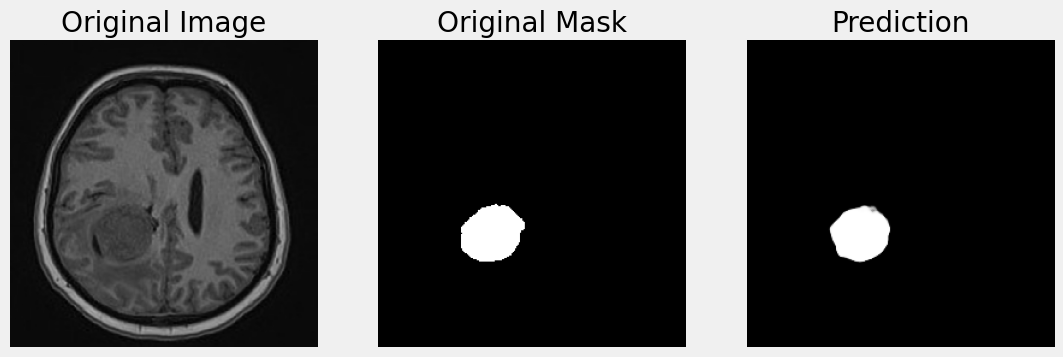

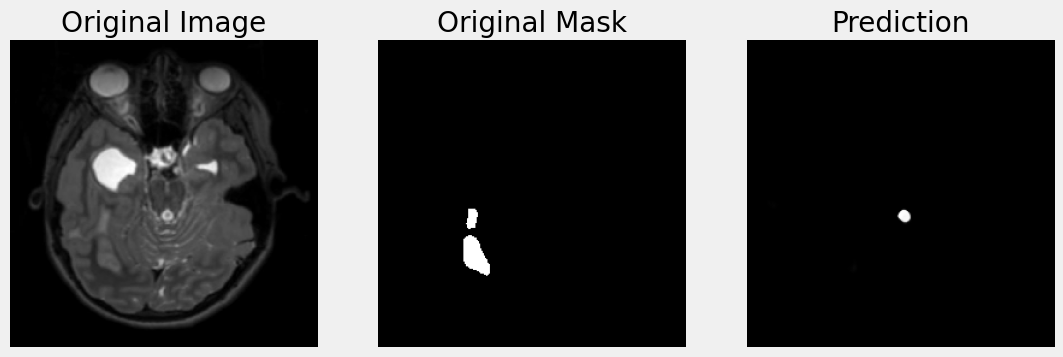

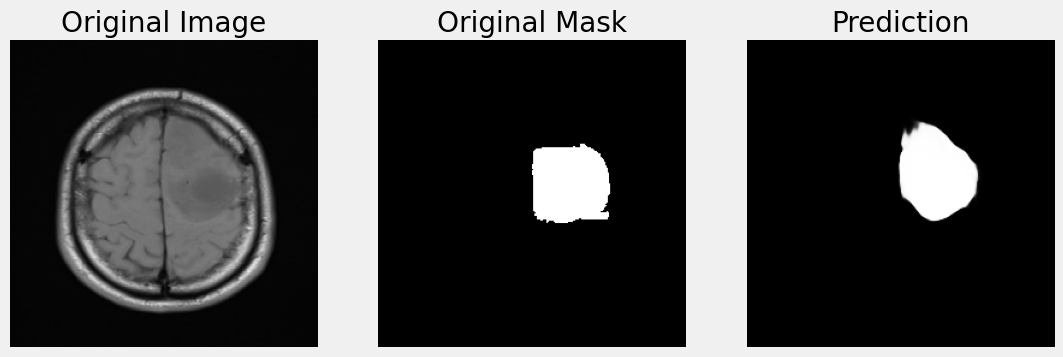

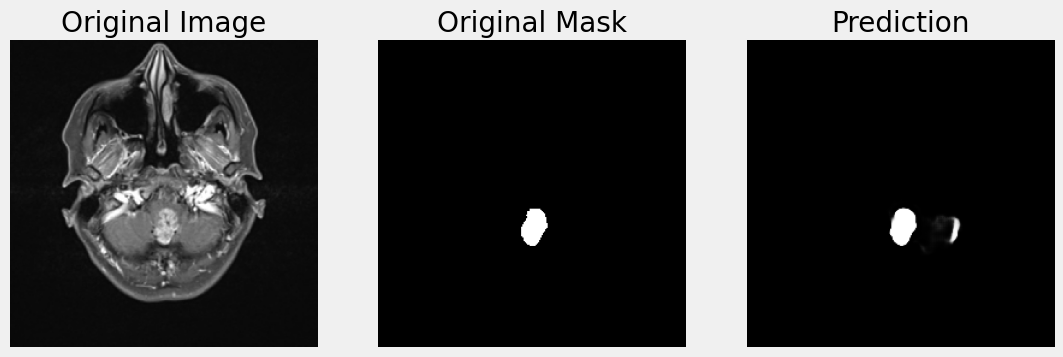

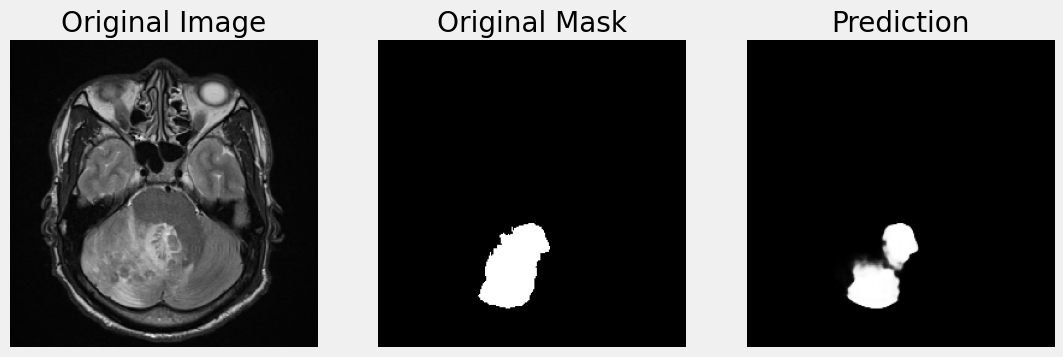

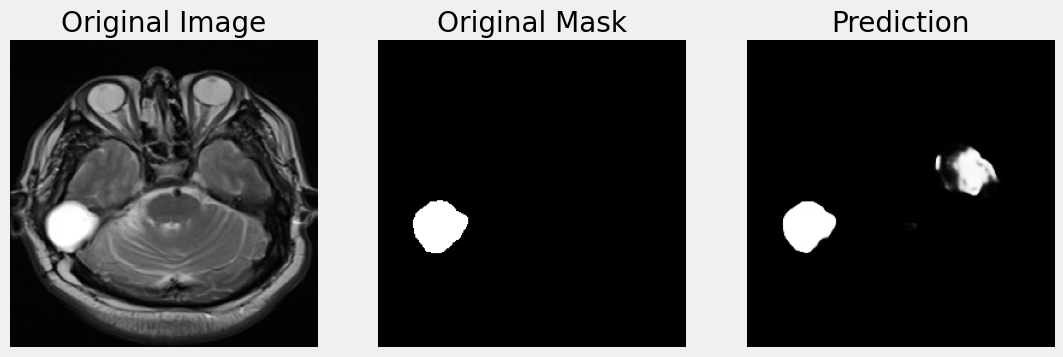

In [ ]:
print("Validation Images")
batch = next(val_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

Test Images


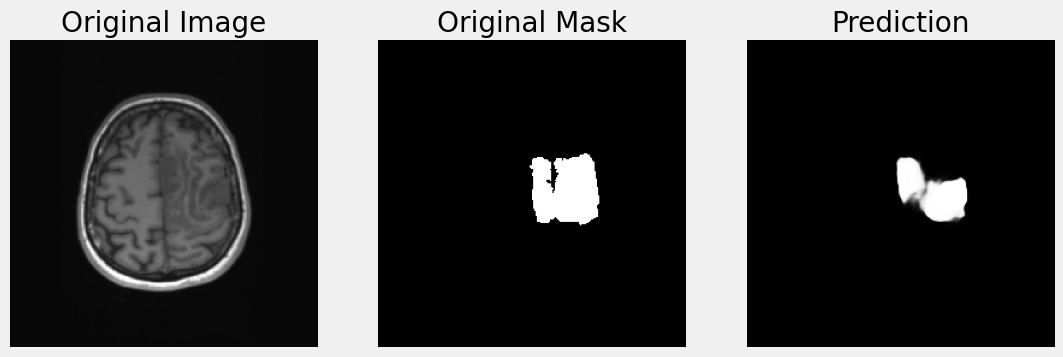

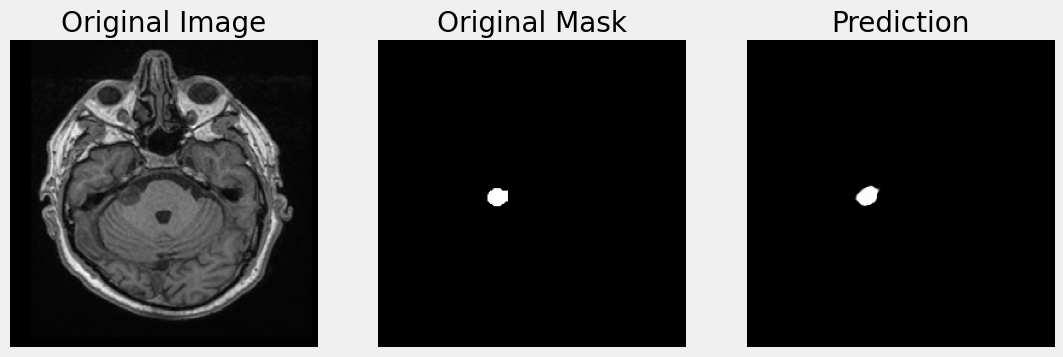

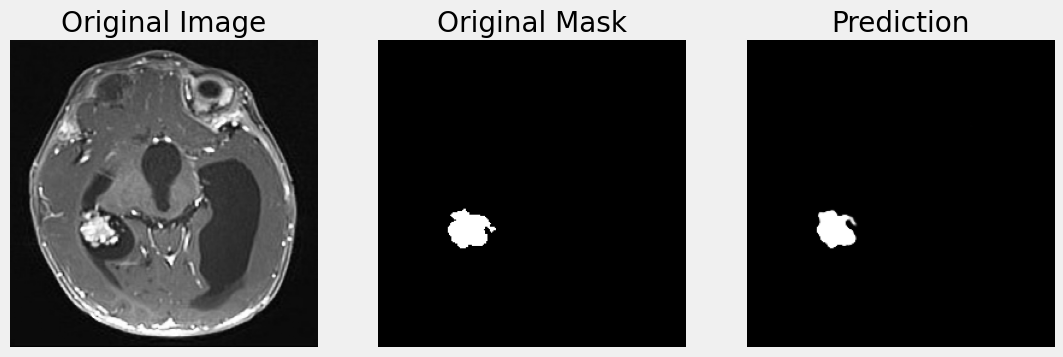

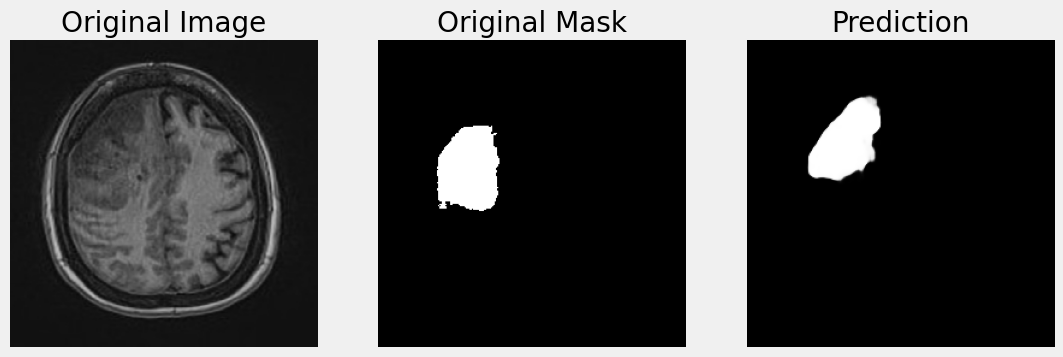

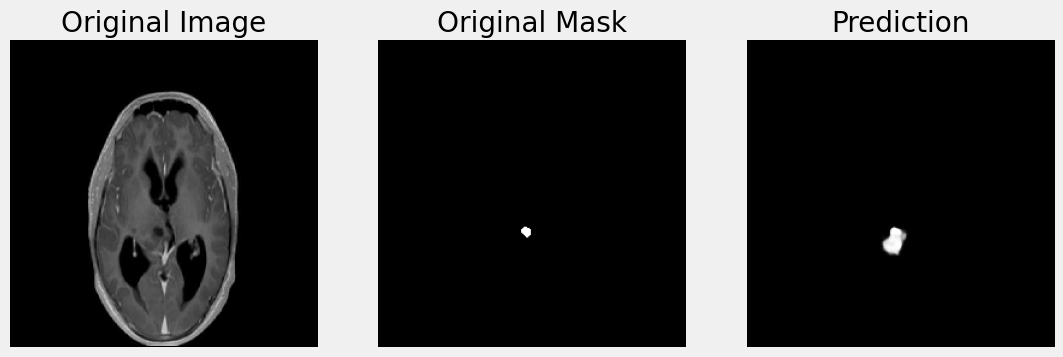

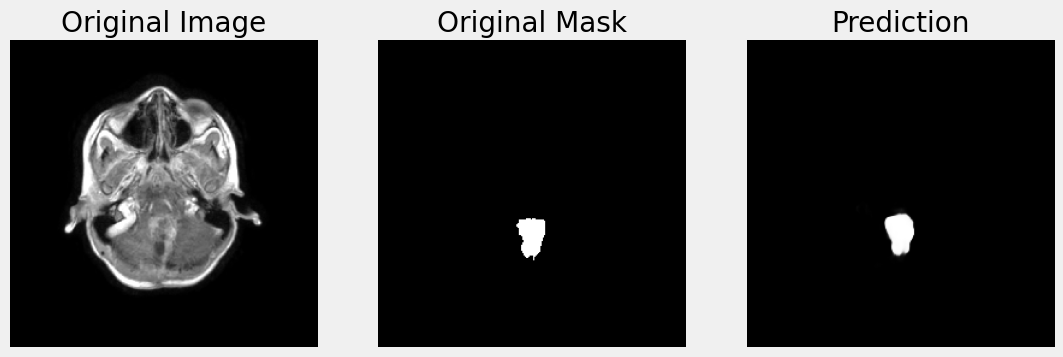

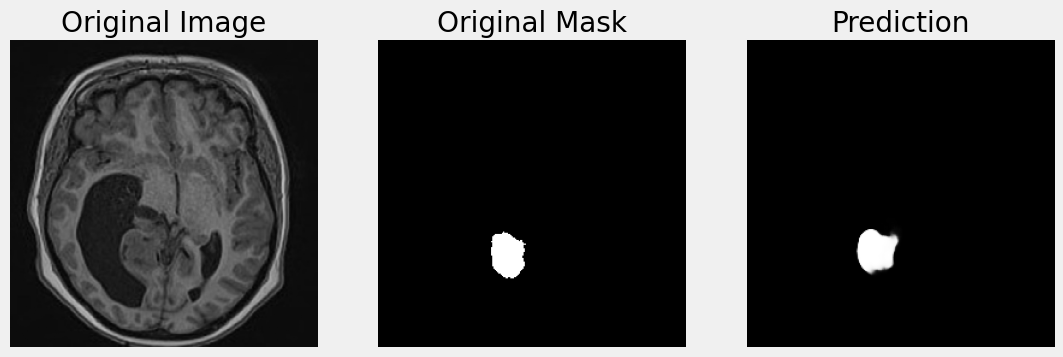

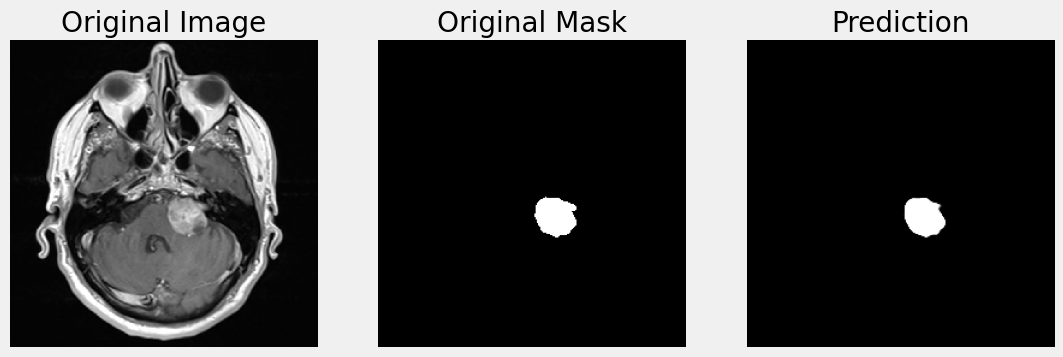

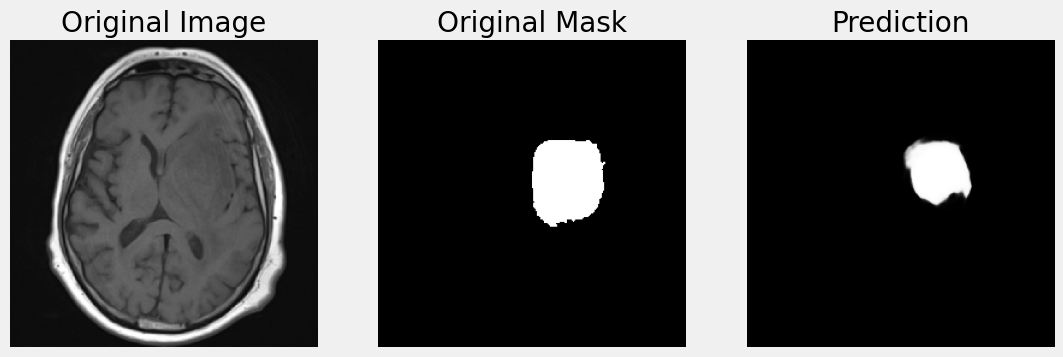

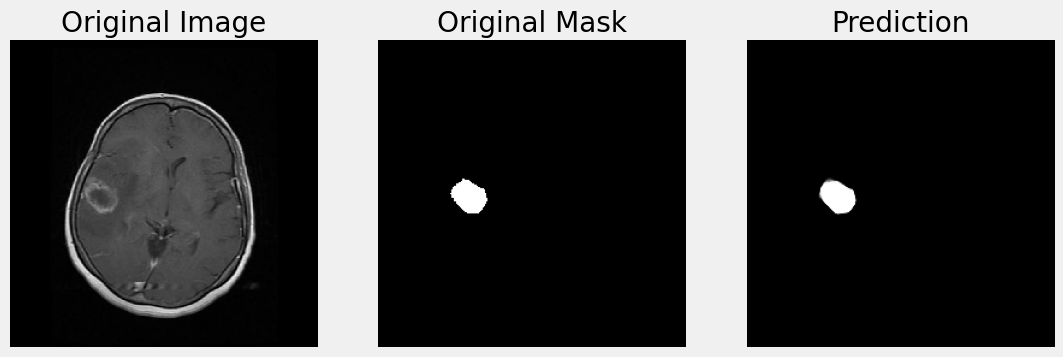

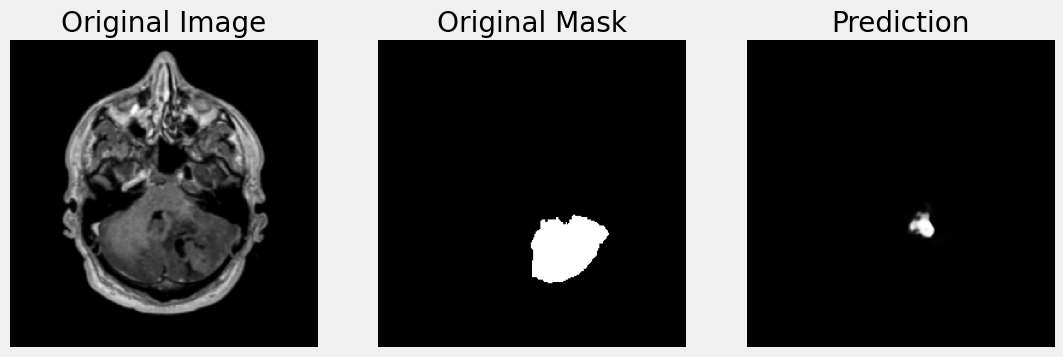

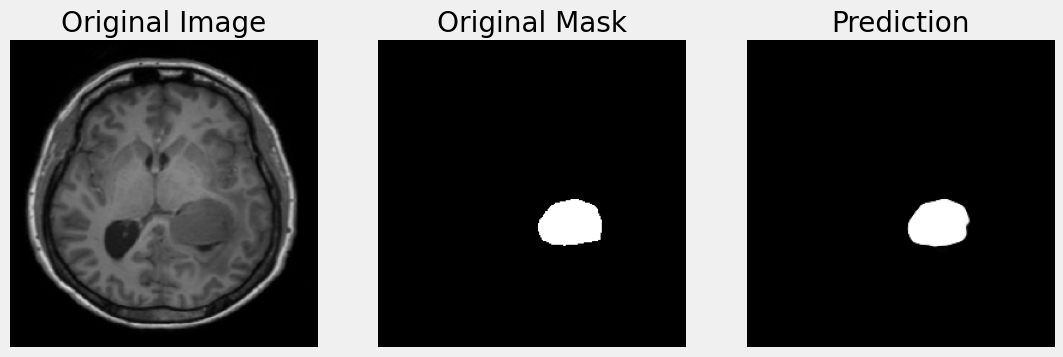

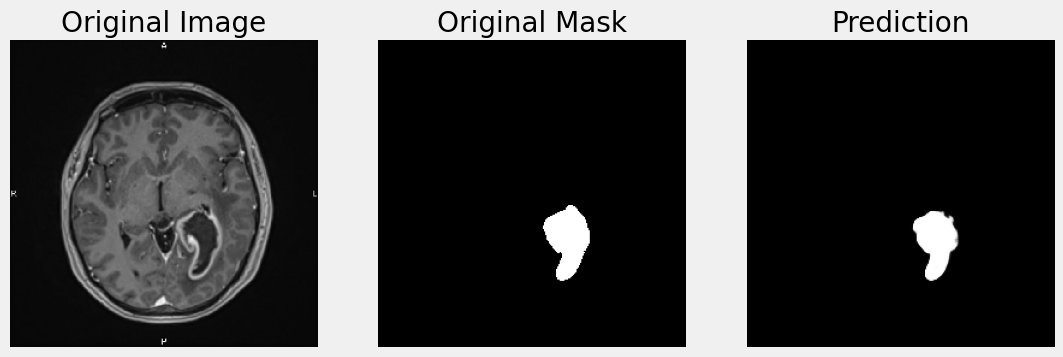

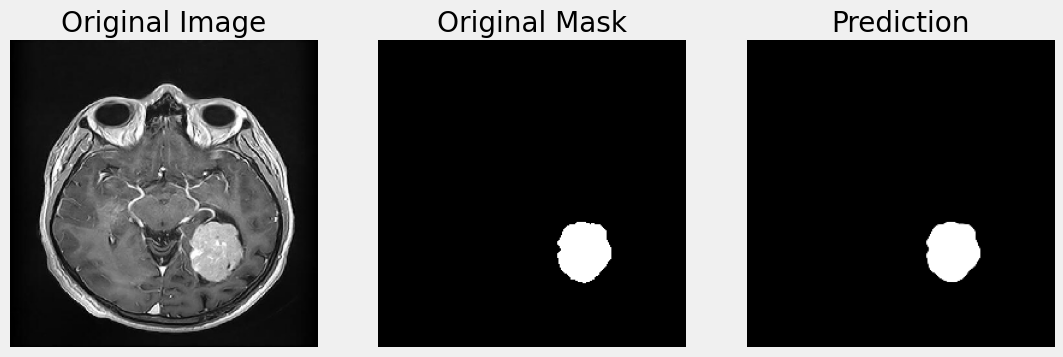

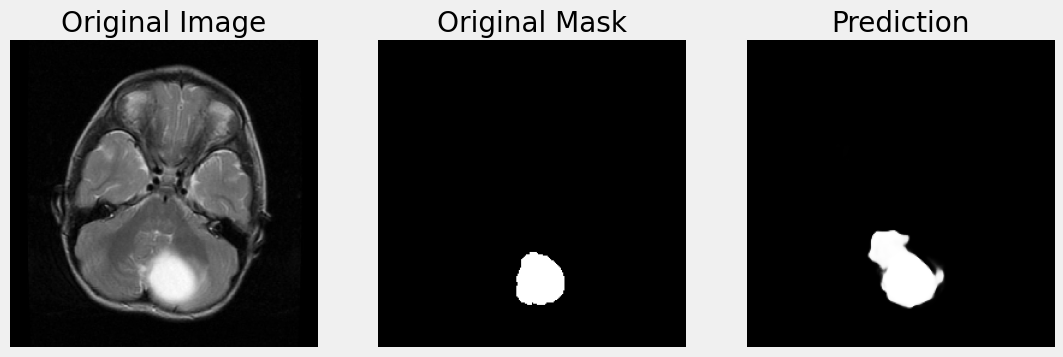

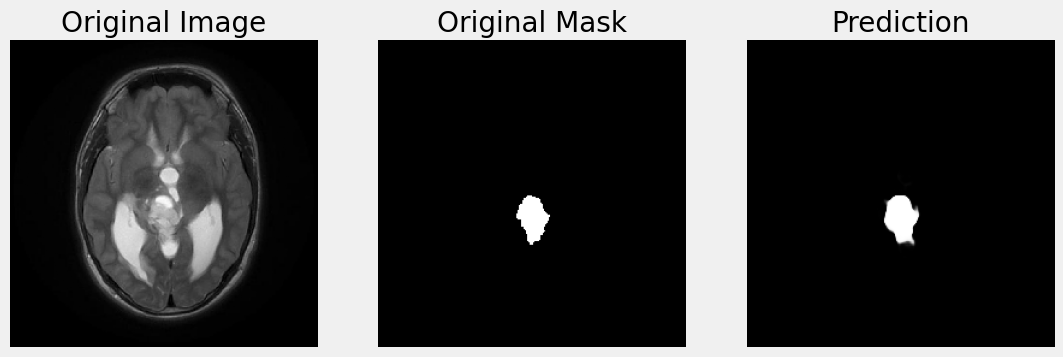

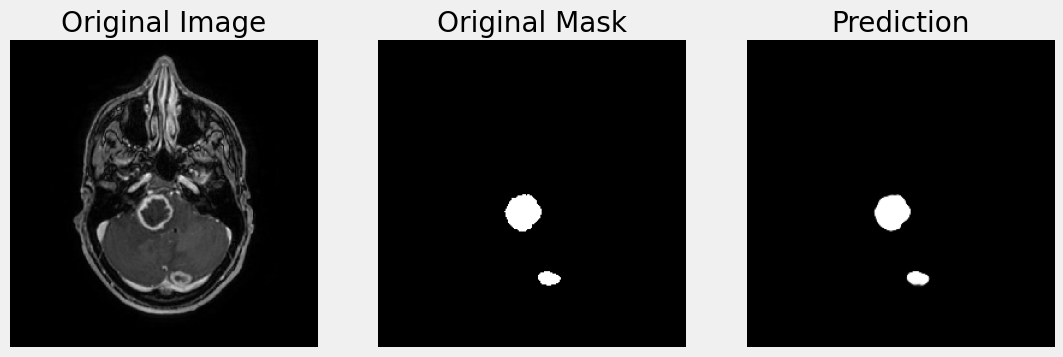

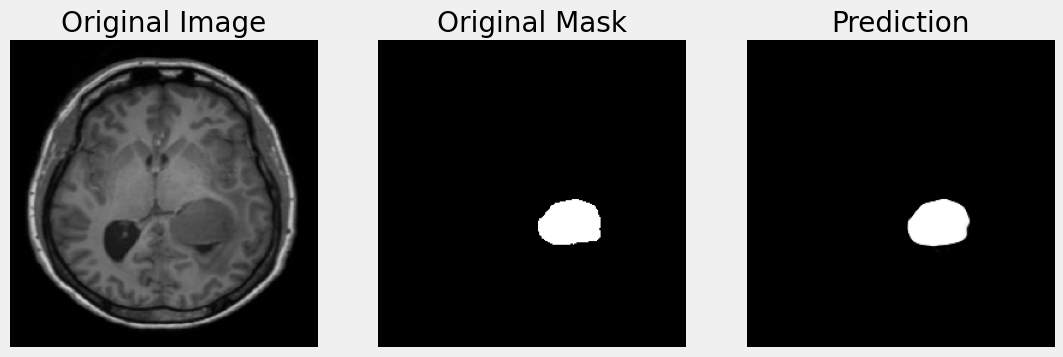

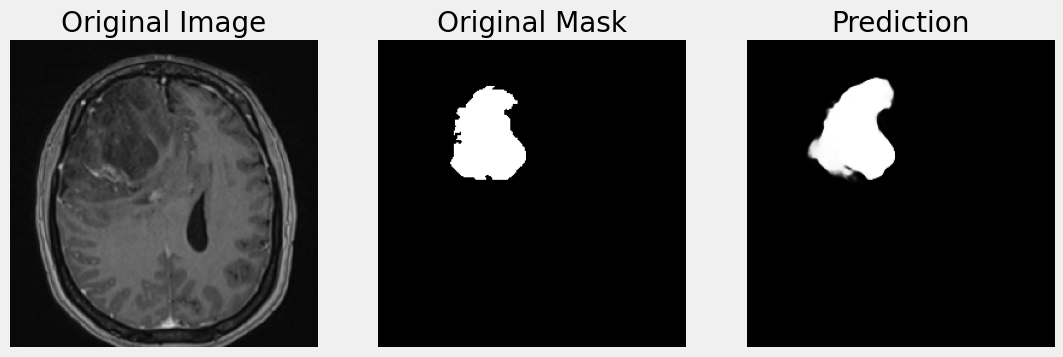

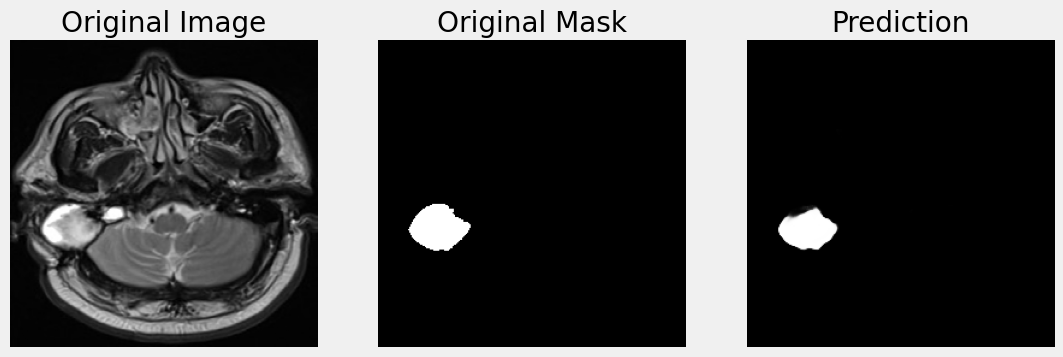

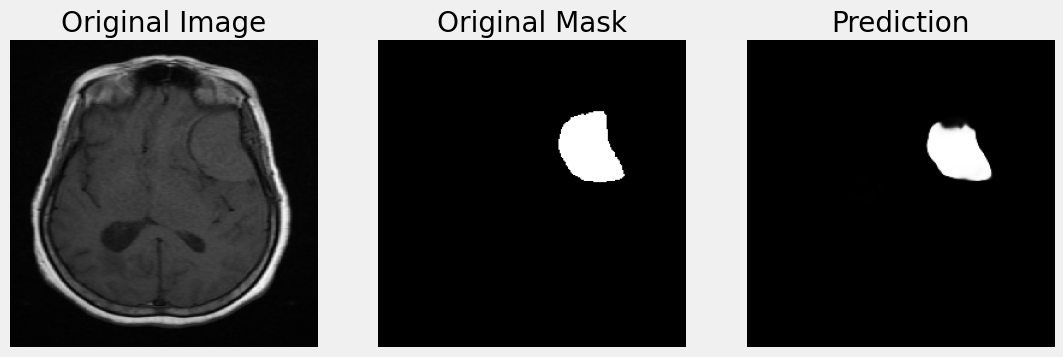

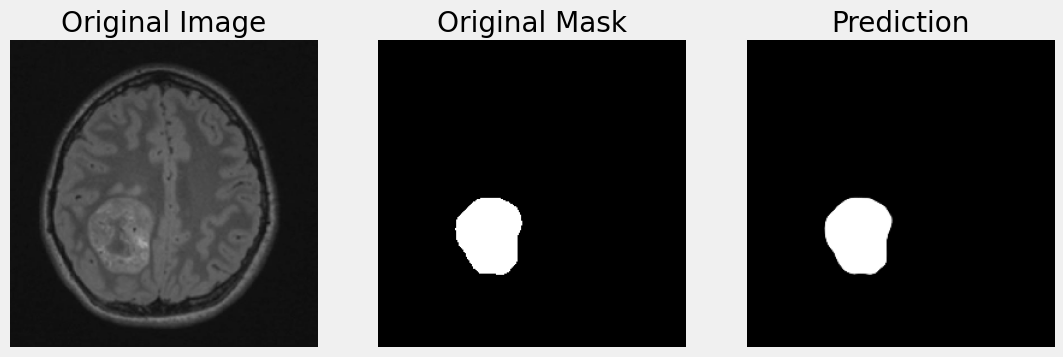

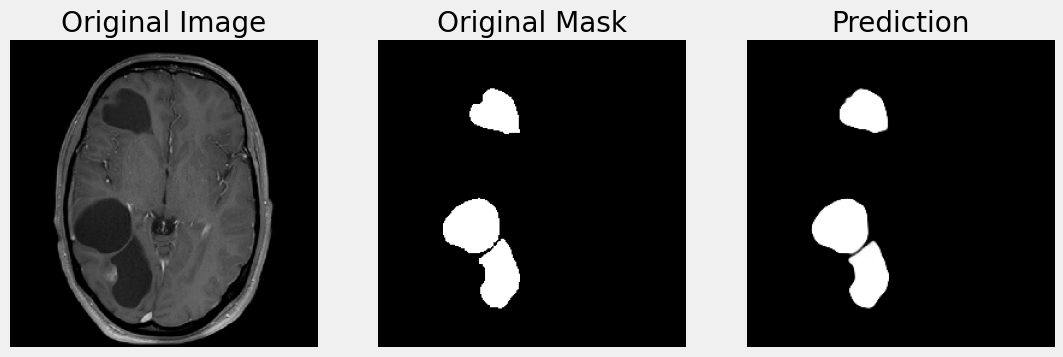

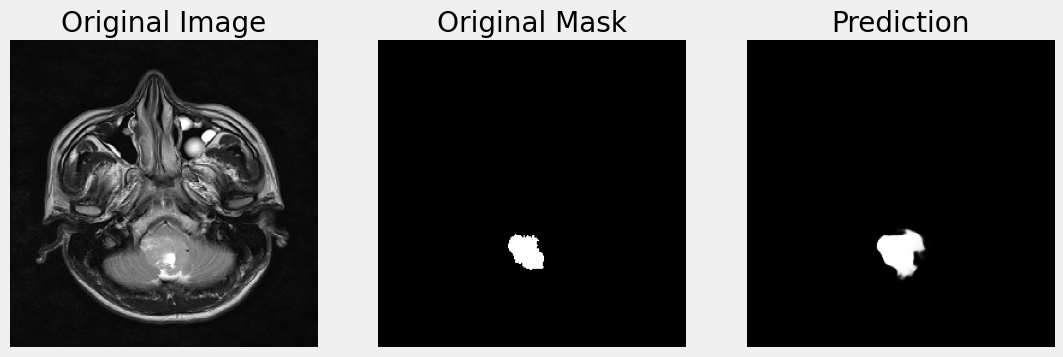

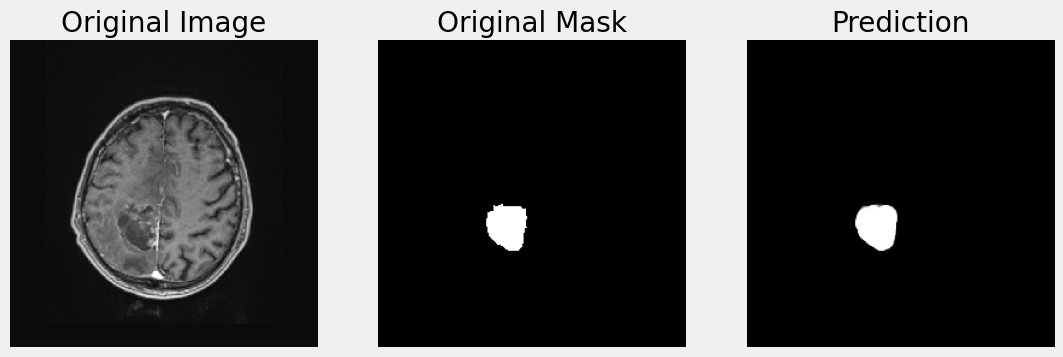

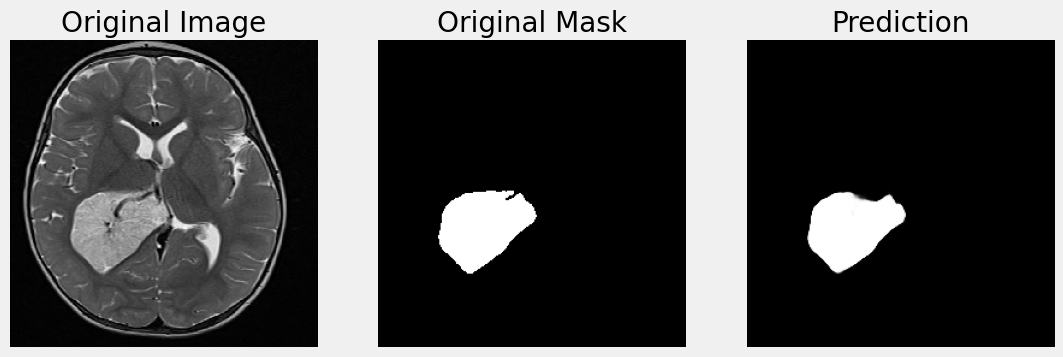

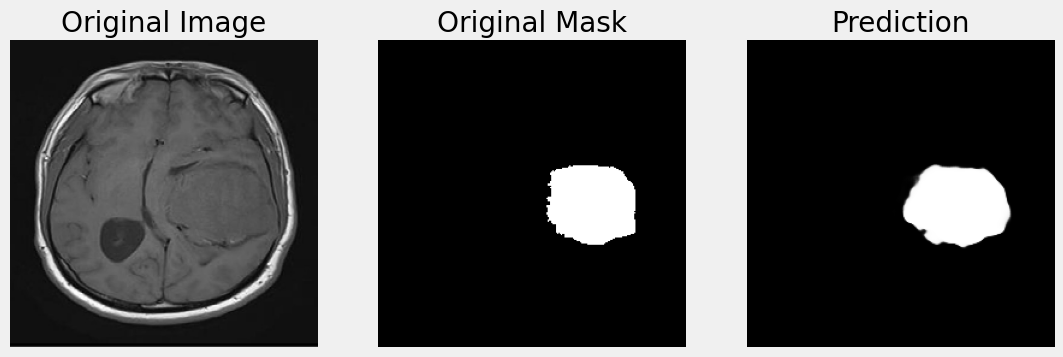

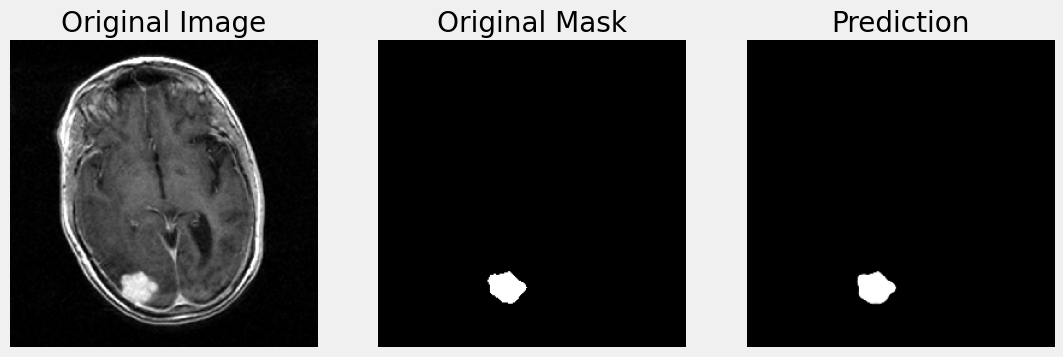

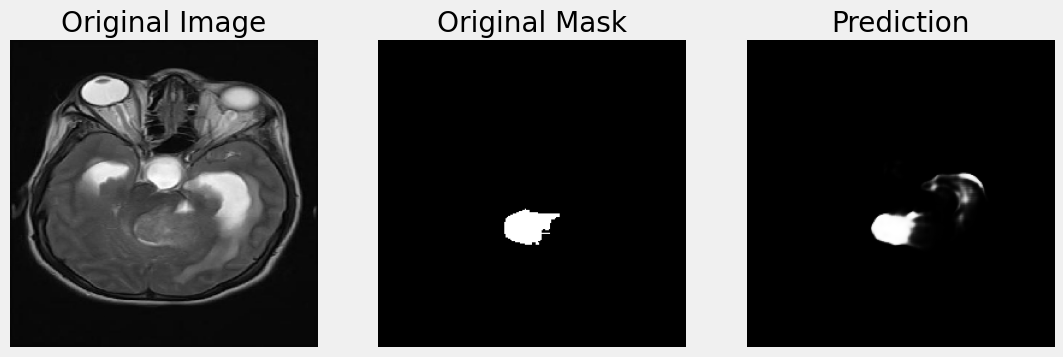

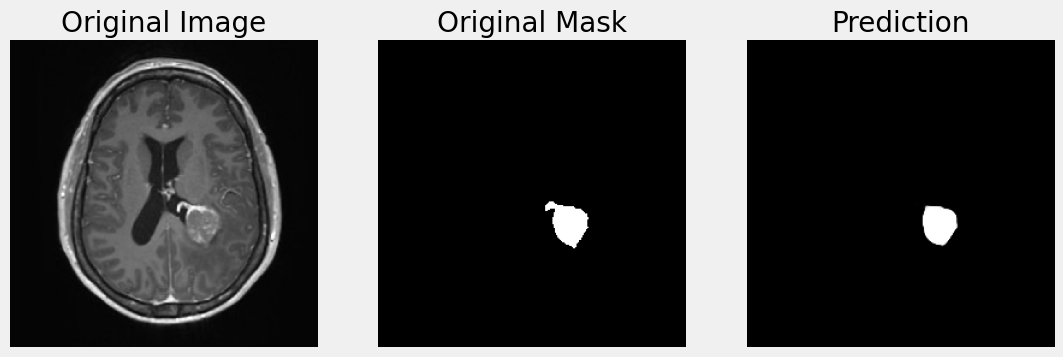

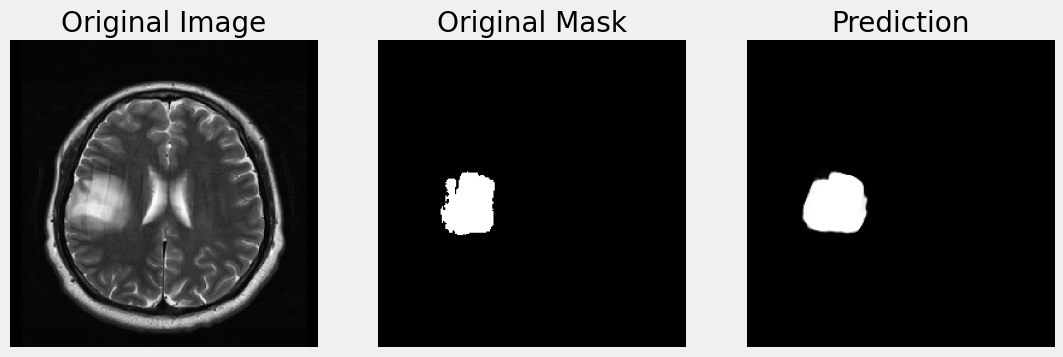

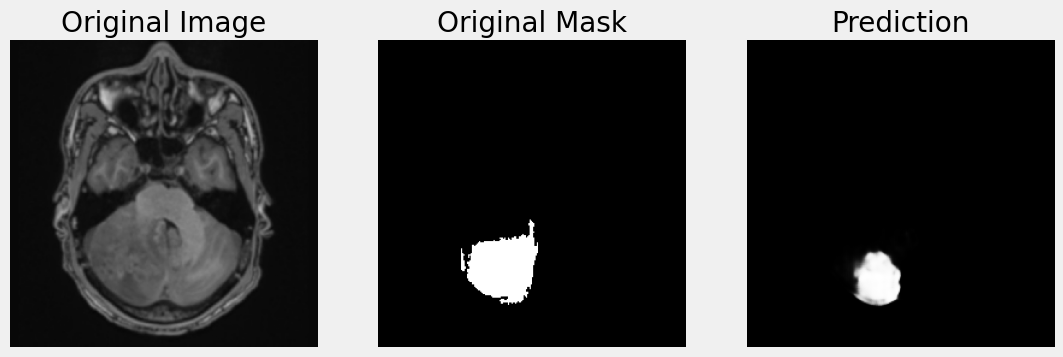

In [ ]:
print("Test Images")
batch = next(test_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

In [ ]:
shutil.copy(save_path, drive_path)

'/content/drive/MyDrive/TumorSegmentasyon/Clean-UNet-VGG16-Adamax-32-bce-dice.h5'